# Rendimiento escolar

Modelo que precide el promedio final del año escolar para un alumno, con fin de identificar bajo desempeño académico.

Se sugiere explorar atributos ambientales del alumno para ver si pueden ser abstraídos en categorías latentes.

### 1. Preliminares

A continuación se definen las características del problema.

#### 1.1 Problema

Variable objetivo: Promedio final del año escolar.

El problema pertenece a uno de regresión, dado que la variable objetivo, definida como el promedio final del año escolar, presenta valores continuos.

Enunciado: promedio final del año escolar para un individuo explicado por atributos personales y ambientales.

#### 1.2 Atributos disponibles

Para explicar el promedio final del año escolar de un estudiante, tenemos disponibles los siguientes atributos:

* school: categórica. Especifica la escuela.
* sex: categórica. Define el sexo.
* age: numérica. Detalla la edad.
* address: categórica. Especifica la ubicación del estudiante (urbana o rural).
* famsize: categórica. Define el tamaño de la familia (menor o igual a 3, mayor a 3).
* Pstatus: categórica. Detalla el estado cohabitacional de los padres.
* Medu: categórica (label encoding). Presenta el nivel educacional de la madre.
* Fedu: categórica (label encoding). Presenta el nivel educacional del padre.
* Mjob: categórica. Especifica la ocupación de la madre.
* Fjob: categórica. Define la ocupación del padre.
* reason: categórica. Es la razón para escoger escuela.
* guardian: categórica. Define el apoderado.
* traveltime: categórica. Especifica el tiempo de viaje entre el hogal y la escuela. Presenta rangos.
* studytime: categórica. Detalla las horas semanales de estudio.
* failures: numérica. Especifica el número de clases reprobadas.
* schoolsup: binaria. Si recibe o no apoyo educacional del colegio.
* famsup: binaria. Si recibe apoyo educacional familiar.
* paid. binaria. Si recibe clases particulares pagadas o no.
* activities: binaria. Si realiza actividades extracurriculares o no.
* nursery: binaria. Define si asistió o no a la guardería infantil.
* higher: binaria. Si desea proseguir estudios superiores.
* internet: binaria. Si tienes acceso a internet desde el hogar.
* romantic: binaria. Si tiene una relación amorosa.
* famrel: categórica ordinal. Define la calidad de las relaciones familiares.
* freetime: categórica ordinal. Tiempo libre fuera del colegio.
* goout: categórical ordinal. Define si sale con amigos.
* Dalc: categórica ordinal. Consumo de alcohol en días de semana.
* Walc: categórica ordinal. Consumo de alcohol en fines de semana.
* health: categórica ordinal. Estado de salud actual.
* absences: numérica. Cantidad de ausencias escolares.

En cuanto a las variables objetivo:

* G1: numérica. Notas durante el primer semestre (V.O 1 modelo descriptivo).
* G2: numérica. Notas durante el segundo semestre (V.O 2 modelo descriptivo).
* G3: numérica. Promedio final (V.O 3 modelo descriptivo, y V.O modelo predictivo).

#### 1.3 Métricas para medir desempeño

Para medir el desempeño de nuestro modelo utilizaremos dos medidas:

* Error cuadrático medio (MSE): representa la expectativa del error cuadrático, donde este se define a partir de las distancias entre el valor estimado y el valor real de la variable objetivo. Nos permite medir la calidad de nuestro ajuste, e idealmente queremos que sea pequeño.

* r2_score: representa la proporción porcentual de la varianza total de la variable objetivo que es explicada por los atributos agregados al modelo.

### 2. Aspectos computacionales

#### 2.1 Librerias a utilizar

Las librerias y versiones utilizadas son:

* numpy 
* pandas
* matplotlib
* seaborn
* warnings
* sklearn

Además, trabajaremos con la versión de Python 3.8.3.

#### 2.2 Proceso tentativo recodificación de atributos

Se hará un análisis exploratorio tanto de la variable objetivo como de sus atributos donde:

* Se identificará la presencia de valores nulos, perdidos o caracteres incorrectos, y serán eliminados del modelo ya que nos generan problemas en la estimación. En esta etapa, se utilizará la función importada "calidad_datos" que nos permite tener una perspectiva global.

* Estudio de dimensionalidad. Se aplicará un estudio de latencia para identificar posibles agrupaciones entre variables.

* Transformación de variables categóricas mediante el uso de binary encoding.

* Estudio de la escala es la cual están definidas las variables numéricas. Si existen diferencias muy grandes en la dimensionalidad de los números se aplicará una estandarización con StandardScaler() de Sklearn.

* Transformación de variables binarias a 1 y 0. Se considerará como 1 la categoría minoritaria.

* Exploración de correlaciones entre atributos y variable objetivo. La idea es identificar atributos que se correlacionan fuertemente y débilmente, para considerar excluirlas del modelo.

#### 2.3 Importación de librerias

In [120]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
import statsmodels.formula.api as smf

# machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#confussion_matrix, roc_aux_score

from calidad_datos import calidad_datos
from graficos import cross_plot

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["figure.dpi"] = 70
warnings.filterwarnings('ignore')

### 3. Descripción

In [121]:
# importación de datos
df = pd.read_csv('students.csv', sep='|', encoding='latin-1').drop('Unnamed: 0', axis=1)

#### 3.0 Calidad de los datos

In [122]:
# lista nulos
null_list = ['sem validade', 'zero', 'nulidade']

In [123]:
# transformacion incorrecto formato de variables
for col in ['age', 'goout', 'health']:
    df[col] = df[col].str.replace('"', "").replace(null_list, [np.nan, np.nan, np.nan]).astype('float')

In [124]:
# reemplazo de valores nulos en otras variables

for col in df.columns:
    if col not in ['age', 'goout', 'health', 'G2']:
        df[col] = df[col].replace(null_list, [np.nan, np.nan, np.nan])
    if col in ['failures', 'absences', 'G1', 'G3']:
        df[col] = df[col].astype(float)

In [125]:
calidad = calidad_datos(df)
calidad

,tipo,nulos,porc_nulos,ceros,porc_ceros,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dist_IQR,limit_inf,limit_sup,outliers
G2,int64,0,0.000000,13,0.032911,395,NaN,NaN,NaN,10.7139,3.7615,0,9,11,13,19,4,3,19,13
failures,float64,5,0.012658,308,0.779747,390,NaN,NaN,NaN,0.335897,0.746883,0,0,0,0,3,0,0,0,82
goout,float64,5,0.012658,0,0.000000,390,NaN,NaN,NaN,3.10256,1.11763,1,2,3,4,5,2,-1,7,0
health,float64,4,0.010127,0,0.000000,391,NaN,NaN,NaN,3.57033,1.3773,1,3,4,5,5,2,0,8,0
G3,float64,3,0.007595,37,0.093671,392,NaN,NaN,NaN,10.4464,4.56801,0,8,11,14,20,6,-1,23,0
age,float64,4,0.010127,0,0.000000,391,NaN,NaN,NaN,16.6982,1.27941,15,16,17,18,22,2,13,21,1
G1,float64,4,0.010127,0,0.000000,391,NaN,NaN,NaN,10.9335,3.32059,3,8,11,13,19,5,0.5,20.5,0
absences,float64,4,0.010127,113,0.286076,391,NaN,NaN,NaN,5.73146,8.02509,0,0,4,8,75,8,-12,20,15
Walc,object,5,0.012658,0,0.000000,390,5,1,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
Dalc,object,3,0.007595,0,0.000000,392,5,1,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


De acuerdo a la tabla anterior se identifica:
* Las clases se encuentran balanceadas
* No existen porcentajes altos de nulos en ninguna de las variables

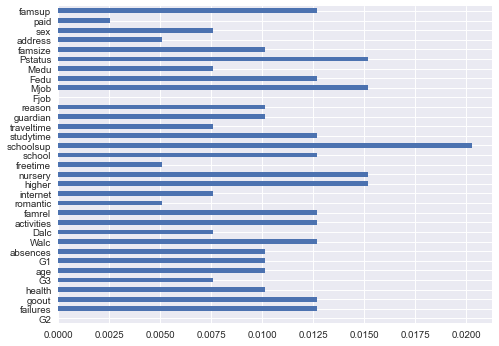

In [126]:
# grafica que visualiza el porcentaje de nulos
calidad['porc_nulos'].plot(kind='barh')

#### 3.1 Inspección visual vector objetivo

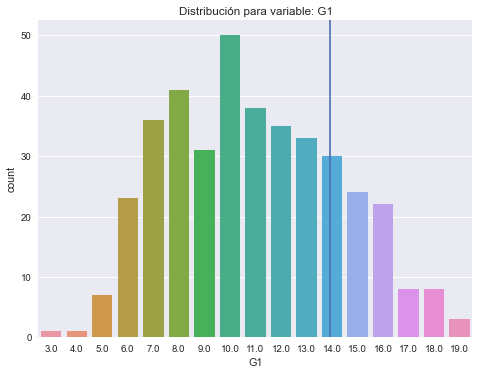

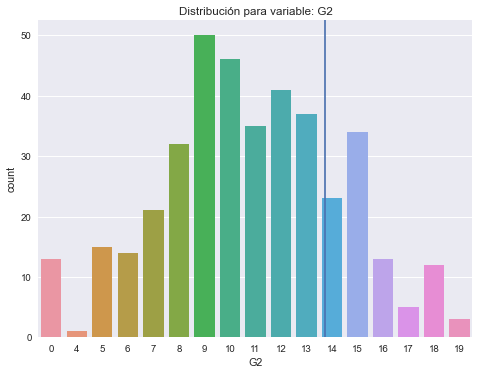

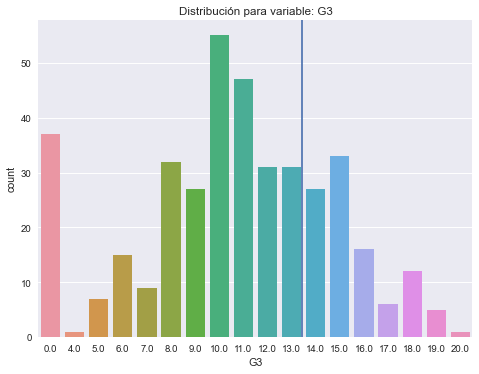

In [127]:
for col in ['G1', 'G2', 'G3']:
    sns.countplot(x=df[col])
    plt.axvline(df[col].mean())
    plt.title(f'Distribución para variable: {col}')
    plt.show()

De las distribuciones anteriores, tanto para las variables de nuestro modelo descriptivo G1 y G2; como para la variable del modelo predictivo G3, se visualiza que:
* La media de los promedios se encuentra cercana a 14
* G2 y G3 presentan individuos con promedio 0, se podría considerar eliminar dichas muestras del modelo ya que tecnicamente esto es un error
* La mayor cantidad de los alumnos presentan un promedio inferior a la media

#### 3.2 Visualizaciónes entre atributos y/o variable objetivo

Text(0.5, 1.0, 'Escuela vs Promedio Final')

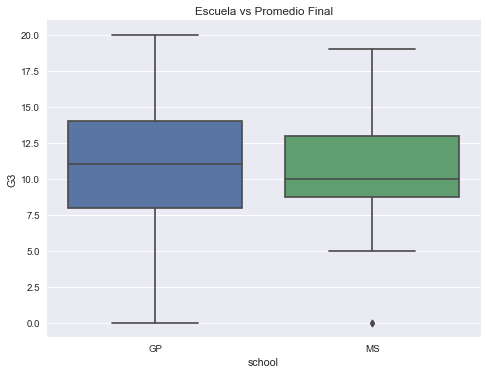

In [139]:
# relacion entre escuela y promedio final
sns.boxplot(x='school', y='G3', data=df)
plt.title('Escuela vs Promedio Final')

Identificamos que la escuela MS posee un espectro de notas con mayor concentración, pero se podría esperar que la escuela GP presente mejores promedios. Esto puede ser visualizado a partir de la mediana en el boxplot.

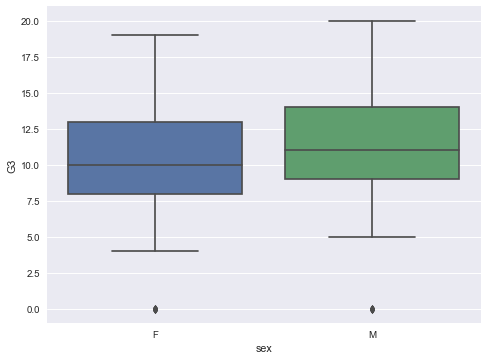

In [155]:
sns.boxplot(x='sex', y='G3', data=df)

El sexo no demuestra grandes diferencias para explicar el promedio final, pero si permite identificar que los hombres, en promedio, tienen promedios mayores que las mujeres.

Text(0.5, 1.0, 'Ocupación madre vs promedio final')

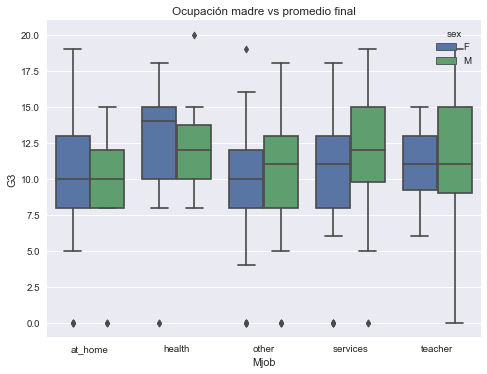

In [162]:
# relacion ocupación de la madre en el promedio
sns.boxplot(x='Mjob', y='G3', hue='sex', data=df)
plt.title('Ocupación madre vs promedio final')

Hijos/as de mujeres que trabajan en el área de la salud demuestran mejores promedios, aunque no se presentan grandes diferencias entre las ocupaciones, podría ser una variable que no tenga mucho peso en los coeficientes a estimar.

Text(0.5, 1.0, 'Ocupación padre vs promedio final')

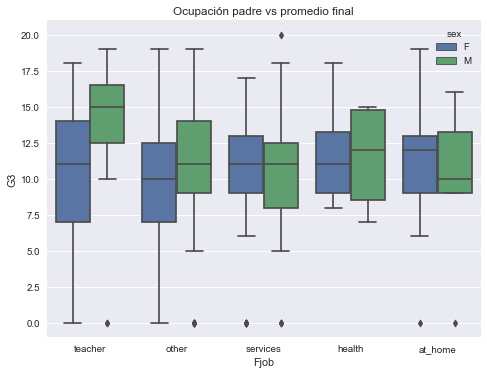

In [165]:
# relacion ocupación de la padre en el promedio
sns.boxplot(x='Fjob', y='G3', hue='sex', data=df)
plt.title('Ocupación padre vs promedio final')

Se identifican diferencias importantes entre hijos de hombres que se desarrollan como profesores, donde destancan por sus mejores promedios finales.

Text(0.5, 1.0, 'Tiempo de estudio vs promedio final')

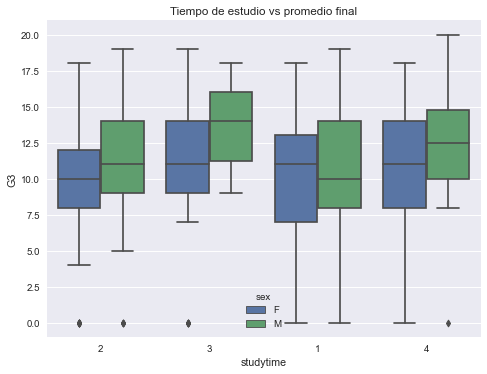

In [172]:
sns.boxplot(x='studytime', y='G3', hue='sex', data=df)
plt.title('Tiempo de estudio vs promedio final')

Visualizamos a priori que los indivudios con 5-10 horas de estudio semanales muestran mejores promedios finales. Visualizamos también que existen observaciones con promedio final 0, las cuales debemos considerar si eliminarlas del modelo ya que no demuestran sentido de estudio y se espera puedan ser errores del conjunto de datos inicial.

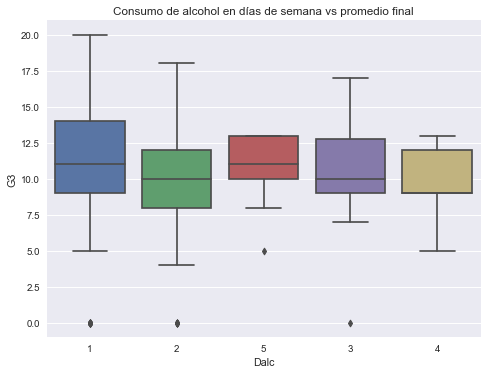

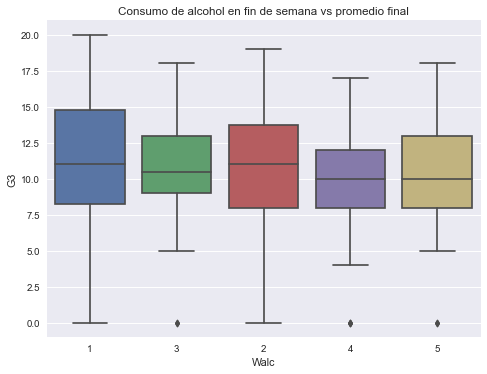

In [178]:
alc_dict = {
    'Dalc': 'días de semana',
    'Walc': 'fin de semana'
}

for col in ['Dalc', 'Walc']:
    sns.boxplot(x=col, y='G3', data=df)
    plt.title(f'Consumo de alcohol en {alc_dict[col]} vs promedio final')
    plt.show()

In [170]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,4.0,1,1,3.0,6.0,5.0,6,6.0
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3.0,1,1,3.0,4.0,5.0,5,6.0
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2.0,2,3,3.0,10.0,NaN,8,10.0
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2.0,1,1,5.0,2.0,15.0,14,15.0
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,4,3,2.0,1,2,5.0,4.0,6.0,10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5,4.0,4,5,4.0,11.0,9.0,9,9.0
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,2,4,5.0,3,4,2.0,3.0,14.0,16,16.0
392,MS,M,21.0,R,GT3,T,1,1,other,other,...,5,5,3.0,3,3,3.0,3.0,10.0,8,7.0
393,MS,M,18.0,R,LE3,T,3,2,services,other,...,4,4,1.0,3,4,5.0,0.0,11.0,12,10.0
